# Data visualization with HoloViews

Load libraries, and do some configuration.

In [1]:
import math
import pandas as pd
import holoviews as hv
import numpy as np
import scipy.stats as stats
%load_ext holoviews.ipython

/home/lucg5005/miniconda/envs/py3k/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/lucg5005/miniconda/envs/py3k/lib/python3.4/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/home/lucg5005/miniconda/envs/py3k/lib/python3.4/site-packages/IPython/nbconvert.py:13: ShimWarning: The `IPython.nbconvert` package has been deprecated. You should import from ipython_nbconvert instead.
  "You should import from ipython_nbconvert instead.", ShimWarning)
/home/lucg5005/miniconda/envs/py3k/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_

## Reading and plotting the data

Read the data file.

In [2]:
data = pd.read_csv('data.csv')
data

,ID,agent 1,agent 2,IPO8,TBP,CYC1,HPRT1,YWHAZ
0,39,20.4433,19.6698,27.409000,29.461500,26.349500,27.238000,25.842667
1,69,14.4100,16.6314,26.734500,29.149000,25.751500,26.502333,24.648333
2,106,9.9300,16.2571,27.512000,30.032500,26.315000,27.085333,25.630333
3,177,31.3967,15.7903,26.640500,28.830000,25.276500,26.254667,24.855667
4,179,34.4300,18.1129,27.120000,29.264000,25.861000,26.661667,25.146667
5,186,19.2367,13.1240,27.615000,29.948000,26.148500,26.958667,25.044333
6,191,21.2233,15.1993,27.946000,30.125000,27.047000,27.062000,25.794000
7,195,28.8200,16.0744,26.305000,28.790500,25.385500,26.380667,24.551667
8,200,34.7433,18.4265,27.688000,29.916000,26.750500,27.697333,26.583667
9,214,25.7100,18.6911,27.597500,29.823500,26.498000,27.332667,26.211000


For convenience, get a list of the column names containing the genes.

In [3]:
genes = list(data.columns[3:])
genes

['IPO8', 'TBP', 'CYC1', 'HPRT1', 'YWHAZ']

In [4]:
agents = list(data.columns[1:3])
agents

['agent 1', 'agent 2']

In [5]:
%output size=100

:Scatter   [IPO8]   (YWHAZ)
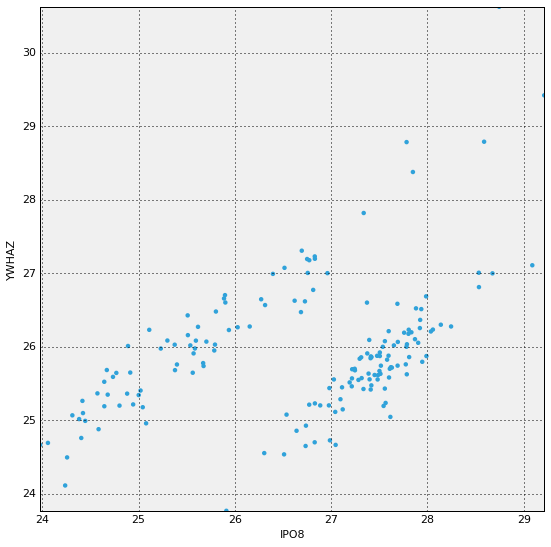

In [6]:
%%output size=250
hv.DFrame(data).scatter('IPO8', 'YWHAZ')

This seems odd, checking, it turns out that the samples have been processed in two batches, the second starting from ID 601.  Create two plots, one with only the data of the first batch, the other with that of the second batch, and create an overlay.  Create a mask to select either batch 1 or 2.

## Overlays

In [7]:
batch1 = data['ID'] < 601
batch2 = data['ID'] >= 601

:Overlay
   .Scatter.Batch_1 :Scatter   [IPO8]   (YWHAZ)
   .Scatter.Batch_2 :Scatter   [IPO8]   (YWHAZ)
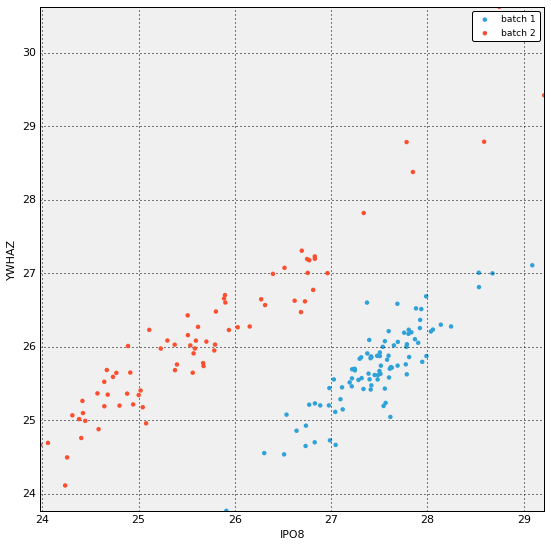

In [8]:
%%output size=250
batch1_plot = hv.DFrame(data[batch1]).scatter('IPO8', 'YWHAZ', label='batch 1')
batch2_plot = hv.DFrame(data[batch2]).scatter('IPO8', 'YWHAZ', label='batch 2')
batch1_plot * batch2_plot

The plot above visually proves that there the batches are indeed the cause of the two clusters observed in the data.

## Linear regression

In [9]:
slope_1, intercept_1, r_1, _, stderr_1 = stats.linregress(data.loc[batch1, 'IPO8'], data.loc[batch1, 'YWHAZ'])
slope_2, intercept_2, r_2, _, stderr_2 = stats.linregress(data.loc[batch2, 'IPO8'], data.loc[batch2, 'YWHAZ'])

In [10]:
x = np.linspace(24.0, 29.0, 11)
y_1 = slope_1*x + intercept_1
y_2 = slope_2*x + intercept_2

In [11]:
fit1_plot = hv.Curve(zip(x, y_1), label='batch 1')
fit2_plot = hv.Curve(zip(x, y_2), label='batch 2')

:Overlay
   .Scatter.Batch_1 :Scatter   [IPO8]   (YWHAZ)
   .Curve.Batch_1   :Curve   [x]   (y)
   .Scatter.Batch_2 :Scatter   [IPO8]   (YWHAZ)
   .Curve.Batch_2   :Curve   [x]   (y)
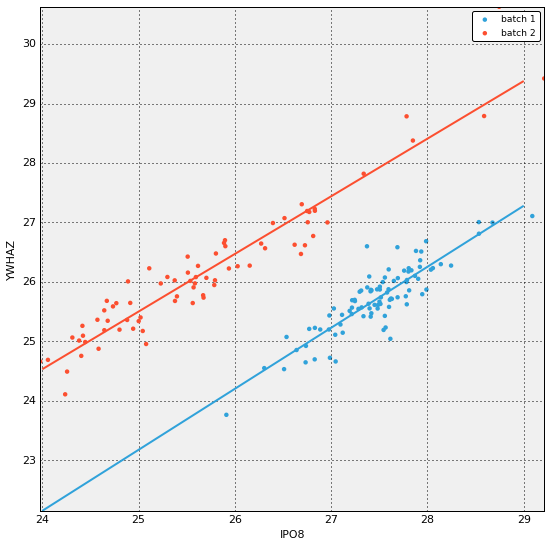

In [12]:
%%output size=250
batch1_plot * fit1_plot * batch2_plot * fit2_plot

## Plotting distributions

To visualize differences in technical variation on the threatment of the samples, plot the distribution of the deviations from the regression.

In [13]:
def fit_func1(x):
    return slope_1*x + intercept_1
def fit_func2(x):
    return slope_2*x + intercept_2

In [14]:
delta_1 = (data.loc[batch1, 'YWHAZ'] - fit_func1(data.loc[batch1, 'IPO8']))*np.sin(np.arctan(slope_1))
delta_2 = (data.loc[batch2, 'YWHAZ'] - fit_func2(data.loc[batch2, 'IPO8']))*np.sin(np.arctan(slope_2))

:Overlay
   .Distribution.Batch_1 :Distribution   [Value]   (Frequency)
   .Distribution.Batch_2 :Distribution   [Value]   (Frequency)
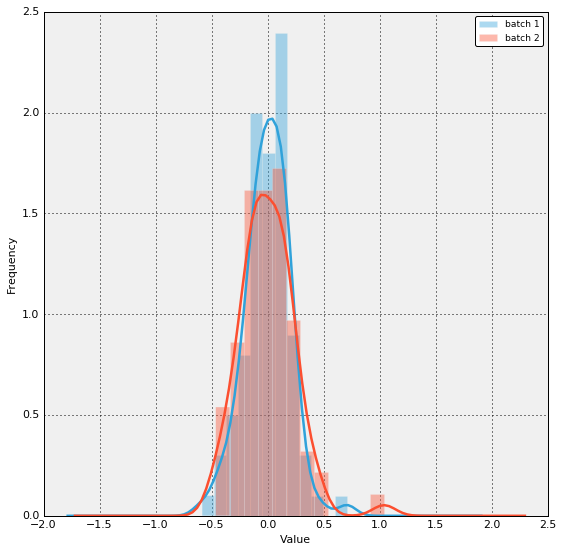

In [15]:
%%output size=250
delta_plot1 = hv.Distribution(delta_1, label='batch 1')
delta_plot2 = hv.Distribution(delta_2, label='batch 2')
delta_plot1 * delta_plot2

## GridSpace

Show the gene expression versus the agent concentrations.

In [16]:
keys = [(g, a) for g in genes for a in agents]

In [17]:
plots = {k: hv.DFrame(data).scatter(*k) for k in keys}

:GridSpace   [agent,gene]
   :Scatter   [YWHAZ]   (agent 2)
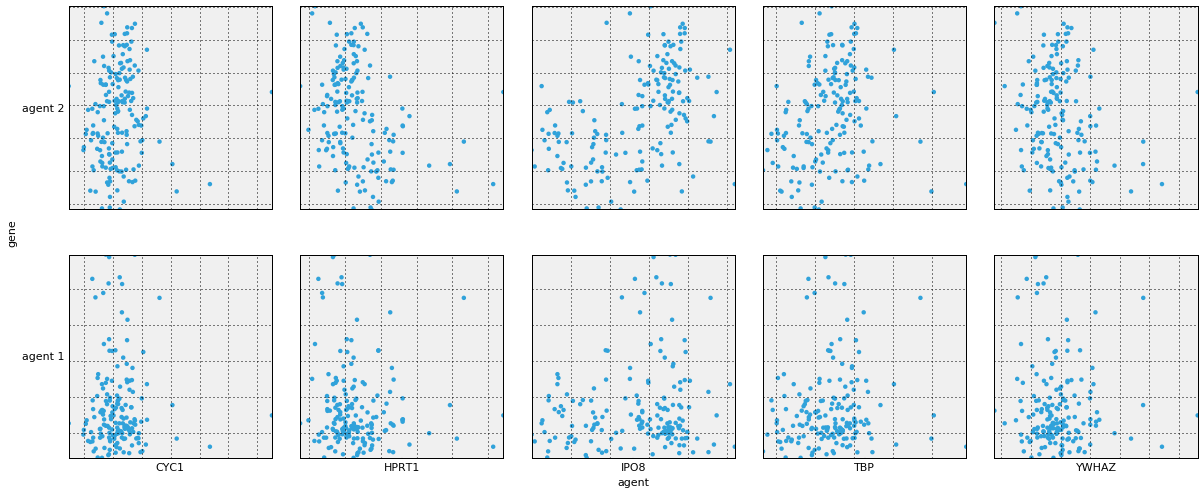

In [18]:
%%output size=400
hv.GridSpace(plots, kdims=['agent', 'gene'])

## HoloMap

:HoloMap   [agent,gene]
   :Scatter   [YWHAZ]   (agent 2)
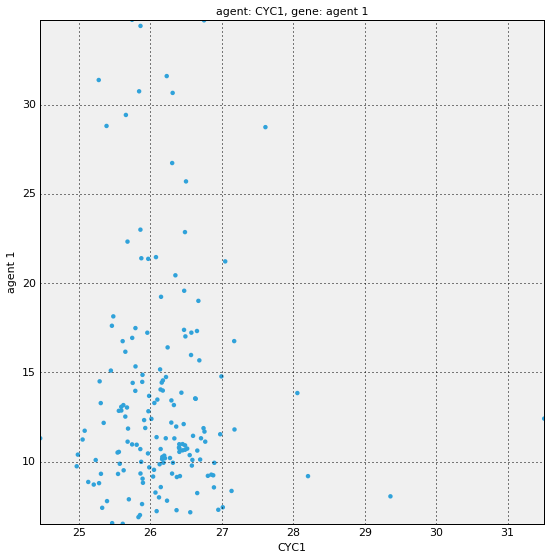
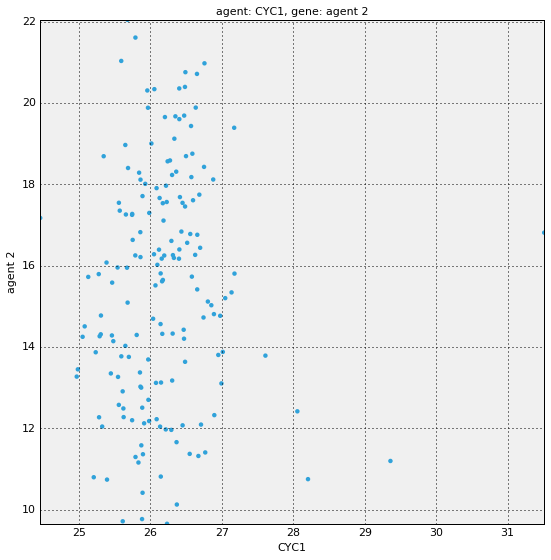
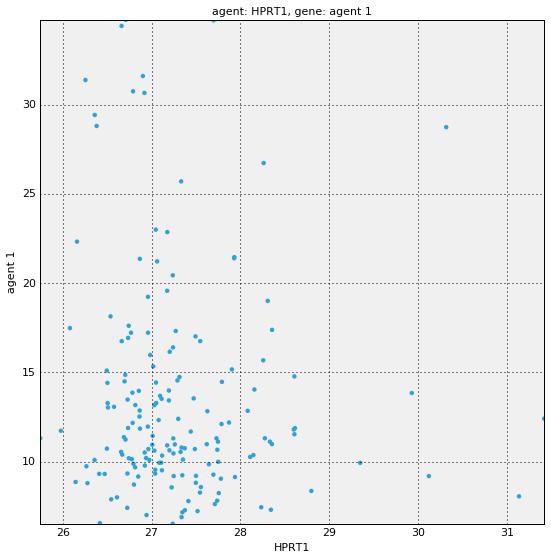
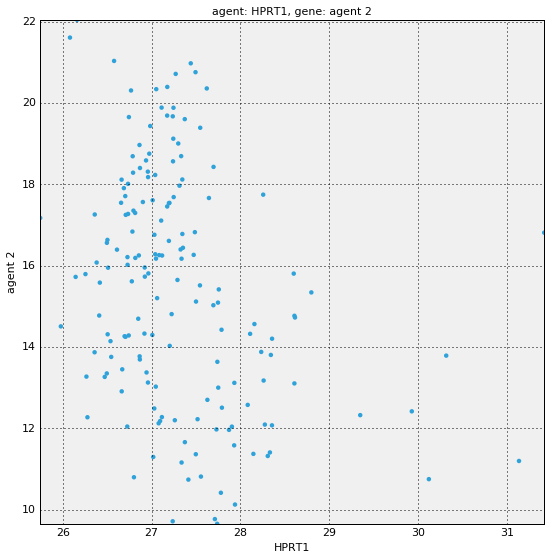
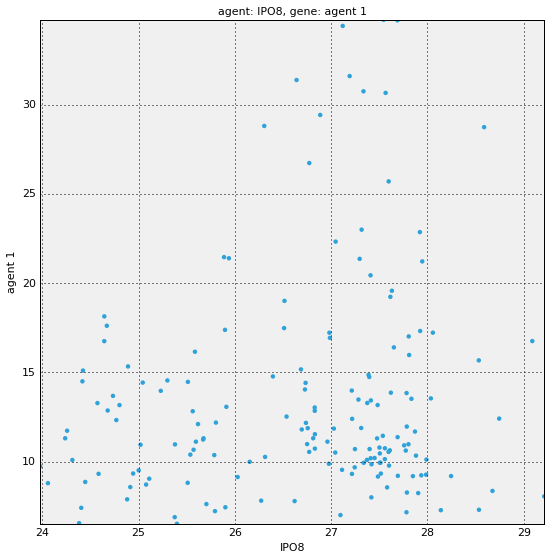
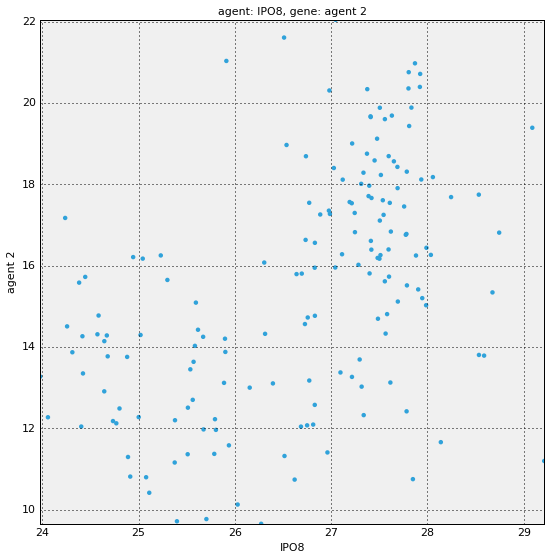
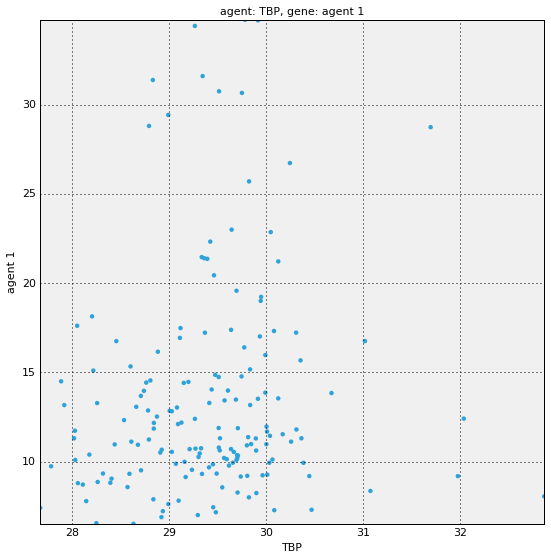
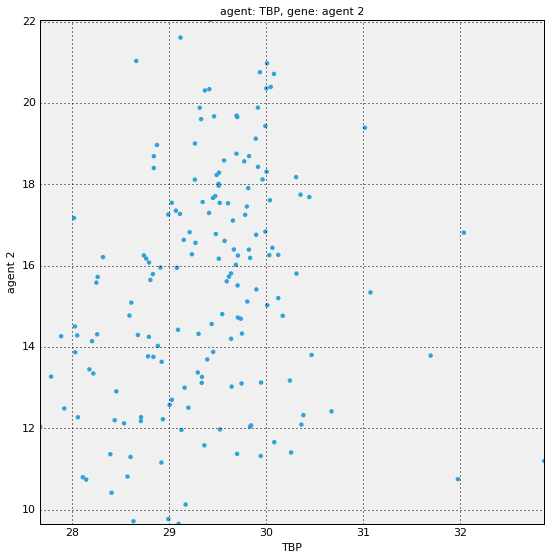
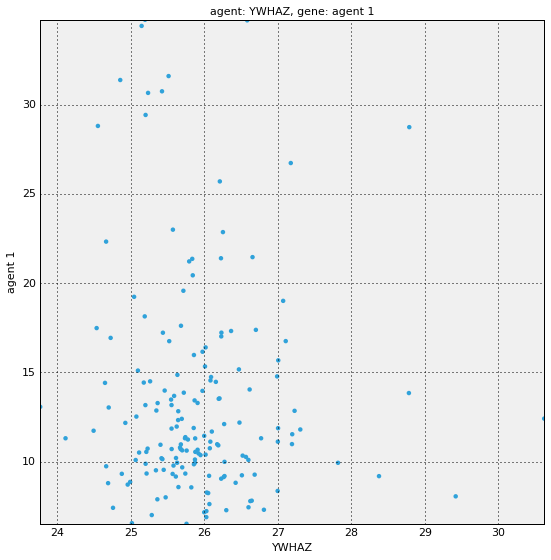
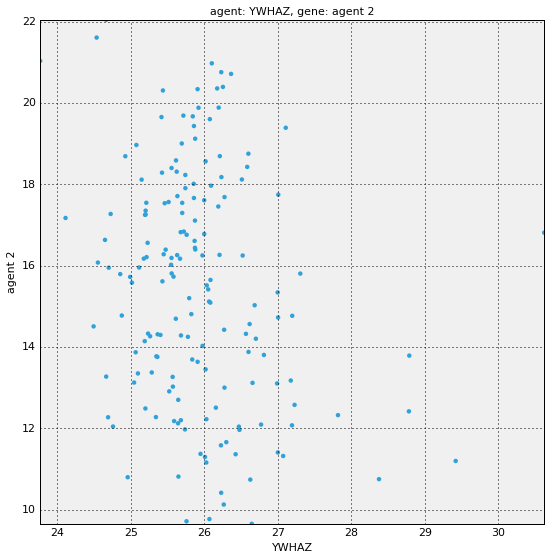

In [21]:
%%output size=250
hv.HoloMap(plots, kdims=['agent', 'gene'])